# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 2.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=3ceebab4f170d5eaf0a4c3e34811d3e077e42bd17ef470225f49a3dd8ecab969
  Stored in directory: /Users/geyne/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [4]:
#KNOWING CITIES 
cities

['bocas del toro',
 'iqaluit',
 'whitby',
 'puerto natales',
 'ilulissat',
 'wahpeton',
 'kittila',
 'nova vicosa',
 'port-aux-francais',
 'lebu',
 'lae',
 'edinburgh of the seven seas',
 'kodiak',
 'kapoeta',
 'mount isa',
 'tannum sands',
 'olonkinbyen',
 'zhanaozen',
 'papatowai',
 'ushuaia',
 'carnarvon',
 'choyr',
 'dudinka',
 'kingston',
 'thompson',
 'west island',
 'acarau',
 'berdigestyakh',
 'adamstown',
 'albany',
 'blackmans bay',
 'college',
 'bethel',
 'taiohae',
 'winnetka',
 'vilyuchinsk',
 'saipan',
 'waitangi',
 'barroquinha',
 'esuk oron',
 "st. john's",
 'chittagong',
 'susuman',
 'dedovichi',
 'miri',
 'laguna',
 "karaidel'",
 'port glaud',
 'bredasdorp',
 'preobrazheniye',
 'we',
 'lillestrom',
 'ust-nera',
 'khandyga',
 'gondar',
 'sokoni',
 'bilibino',
 'rawatsar',
 'udachny',
 'tralee',
 'yellowknife',
 'atafu village',
 'grytviken',
 'tranovaho',
 'fuvahmulah',
 'boali',
 'lihue',
 'aripuana',
 'flin flon',
 'lhasa',
 'white hall',
 'egilsstadir',
 'polyarnyy'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#Pre requesting to Know api structure
from api_keys import weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid=eb1e82e686f6e8767a56df0dbdc0d1b6&q=nemuro"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 145.575, 'lat': 43.3236},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 268.92,
  'feels_like': 261.92,
  'temp_min': 268.92,
  'temp_max': 268.92,
  'pressure': 1020,
  'humidity': 49,
  'sea_level': 1020,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 9.42, 'deg': 313, 'gust': 10.39},
 'clouds': {'all': 80},
 'dt': 1708566869,
 'sys': {'country': 'JP', 'sunrise': 1708549634, 'sunset': 1708588545},
 'timezone': 32400,
 'id': 2128975,
 'name': 'Nemuro',
 'cod': 200}

In [9]:
# Set the API base URL
# YOUR CODE HERE#
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # YOUR CODE HERE#
    city_url = f"{url}appid={weather_api_key}&units=Metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # YOUR CODE HERE#
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # YOUR CODE HERE#
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bocas del toro
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | whitby
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | wahpeton
Processing Record 7 of Set 1 | kittila
Processing Record 8 of Set 1 | nova vicosa
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | lae
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | kapoeta
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | tannum sands
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | zhanaozen
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | choyr
Processing R

In [10]:

city_data

[{'City': 'bocas del toro',
  'Lat': 9.3333,
  'Lng': -82.25,
  'Max Temp': 22.25,
  'Humidity': 74,
  'Cloudiness': 100,
  'Wind Speed': 2.13,
  'Country': 'PA',
  'Date': 1708660188},
 {'City': 'iqaluit',
  'Lat': 63.7506,
  'Lng': -68.5145,
  'Max Temp': -30.15,
  'Humidity': 67,
  'Cloudiness': 75,
  'Wind Speed': 1.03,
  'Country': 'CA',
  'Date': 1708660188},
 {'City': 'whitby',
  'Lat': 54.4877,
  'Lng': -0.615,
  'Max Temp': 4.06,
  'Humidity': 87,
  'Cloudiness': 27,
  'Wind Speed': 2.24,
  'Country': 'GB',
  'Date': 1708660188},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 4.22,
  'Humidity': 80,
  'Cloudiness': 58,
  'Wind Speed': 4.61,
  'Country': 'CL',
  'Date': 1708660189},
 {'City': 'ilulissat',
  'Lat': 69.2167,
  'Lng': -51.1,
  'Max Temp': -11.99,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 0,
  'Country': 'GL',
  'Date': 1708659959},
 {'City': 'wahpeton',
  'Lat': 46.2652,
  'Lng': -96.6059,
  'Max Temp': 1.63,
  'Humidi

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [15]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bocas del toro,9.3333,-82.2500,22.25,74,100,2.13,PA,1708660188
1,iqaluit,63.7506,-68.5145,-30.15,67,75,1.03,CA,1708660188
2,whitby,54.4877,-0.6150,4.06,87,27,2.24,GB,1708660188
3,puerto natales,-51.7236,-72.4875,4.22,80,58,4.61,CL,1708660189
4,ilulissat,69.2167,-51.1000,-11.99,79,100,0.00,GL,1708659959
...,...,...,...,...,...,...,...,...,...
565,apatity,67.5641,33.4031,-1.86,98,100,3.90,RU,1708660399
566,adrar,20.5022,-10.0711,14.73,17,0,6.25,MR,1708660399
567,shillong,25.5689,91.8831,15.02,52,40,1.54,IN,1708660399
568,alakurtti,66.9672,30.3491,1.02,96,100,3.96,RU,1708660399


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bocas del toro,9.3333,-82.2500,22.25,74,100,2.13,PA,1708660188
1,iqaluit,63.7506,-68.5145,-30.15,67,75,1.03,CA,1708660188
2,whitby,54.4877,-0.6150,4.06,87,27,2.24,GB,1708660188
3,puerto natales,-51.7236,-72.4875,4.22,80,58,4.61,CL,1708660189
4,ilulissat,69.2167,-51.1000,-11.99,79,100,0.00,GL,1708659959


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

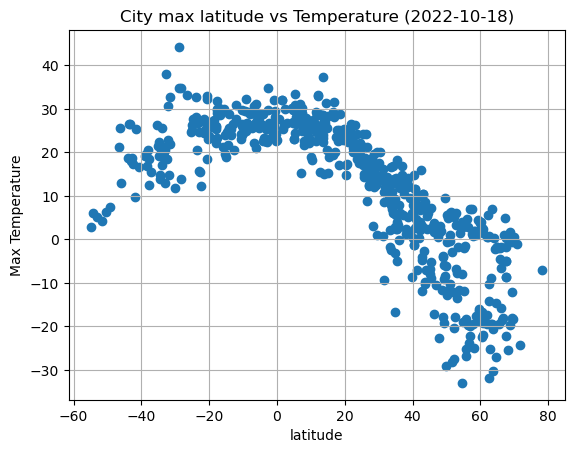

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp']
)
plt.title('City max latitude vs Temperature (2022-10-18)')
plt.grid(True)
plt.xlabel('latitude')
plt.ylabel('Max Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

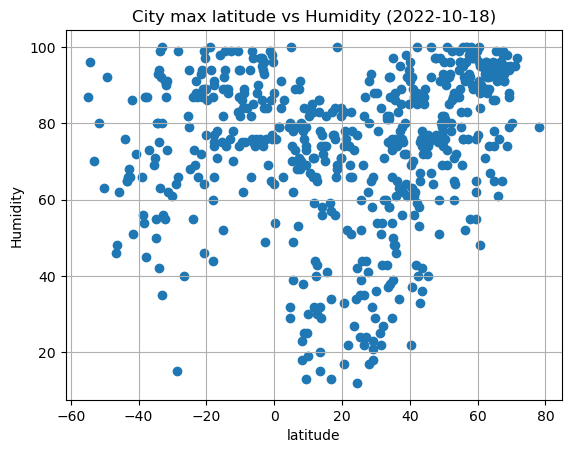

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity']
)
plt.title('City max latitude vs Humidity (2022-10-18)')
plt.grid(True)
plt.xlabel('latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

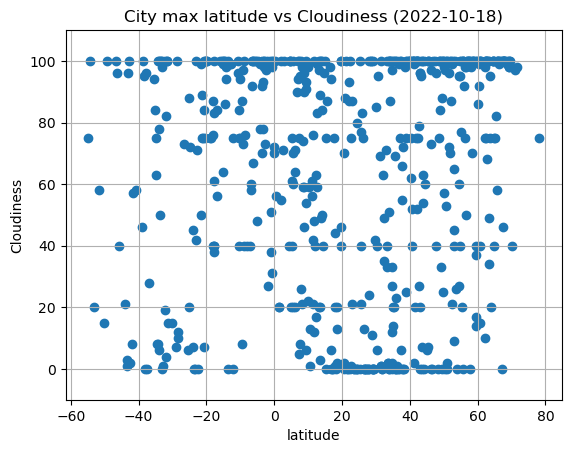

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness']
)
plt.title('City max latitude vs Cloudiness (2022-10-18)')
plt.grid(True)
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.ylim(-10,110)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

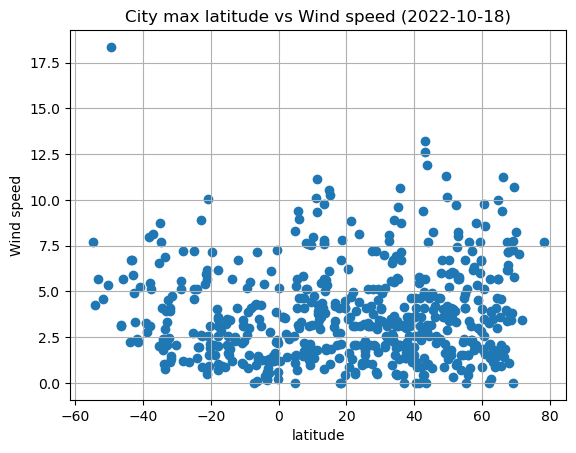

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed']
)
plt.title('City max latitude vs Wind speed (2022-10-18)')
plt.grid(True)
plt.xlabel('latitude')
plt.ylabel('Wind speed')
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
#Importing dependecies
from scipy import stats

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northerns_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northerns_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bocas del toro,9.3333,-82.2500,22.25,74,100,2.13,PA,1708660188
1,iqaluit,63.7506,-68.5145,-30.15,67,75,1.03,CA,1708660188
2,whitby,54.4877,-0.6150,4.06,87,27,2.24,GB,1708660188
4,ilulissat,69.2167,-51.1000,-11.99,79,100,0.00,GL,1708659959
5,wahpeton,46.2652,-96.6059,1.63,100,0,3.60,US,1708660189


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,4.22,80,58,4.61,CL,1708660189
7,nova vicosa,-17.8919,-39.3719,25.31,91,100,3.50,BR,1708660050
8,port-aux-francais,-49.3500,70.2167,7.35,92,100,18.36,TF,1708660189
9,lebu,-37.6167,-73.6500,12.45,87,0,5.12,CL,1708659955
10,lae,-6.7221,146.9847,30.62,66,60,4.30,PG,1708660190
...,...,...,...,...,...,...,...,...,...
549,tual,-5.6667,132.7500,29.06,74,100,3.49,ID,1708660385
550,umirim,-3.6772,-39.3503,23.37,95,70,0.25,BR,1708660386
555,cabedelo,-6.9811,-34.8339,26.37,82,58,4.25,BR,1708660387


###  Temperature vs. Latitude Linear Regression Plot

Text(50, 15, '-0.85')

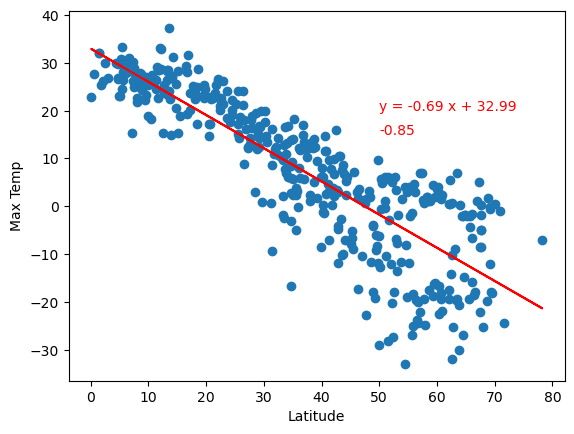

In [48]:
# Linear regression on Northern Hemisphere
x = northerns_hemi_df['Lat']
y = northerns_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line,(50,20),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(50,15),fontsize=10,color="red")


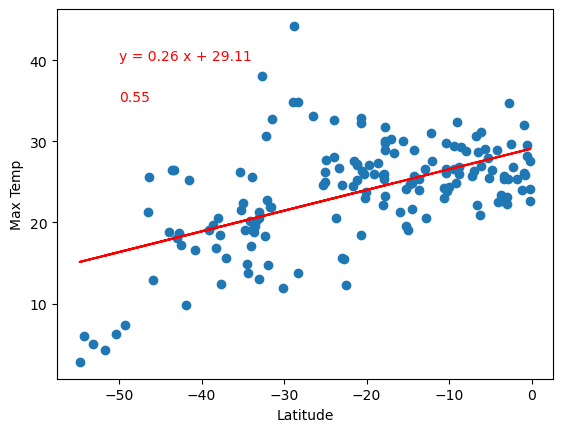

In [49]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line,(-50,40),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(-50,35),fontsize=10,color="red")
plt.show()

**Discussion about the linear relationship:**
- There is a clear correlation between latitude and temperature, the correlation meands that while latitude tends to increse the temperature falls as so
- we also find a correlation of 85 percent for northem hemisfere,while it decrease for southern, it menas that on latitudes higher of 0, the correlation incresse while in the south it does depend but the change is less menaningless.


### Humidity vs. Latitude Linear Regression Plot

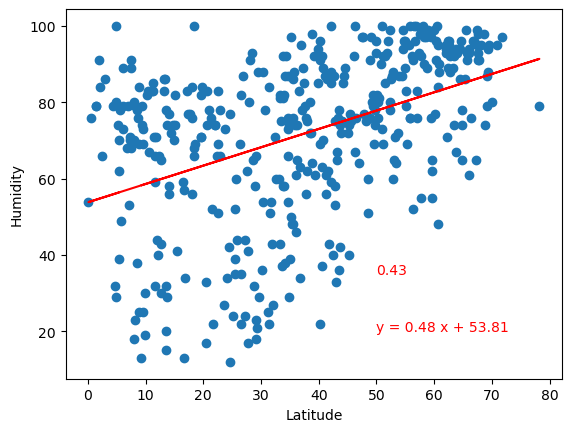

In [53]:
# Northern Hemisphere
x = northerns_hemi_df['Lat']
y = northerns_hemi_df['Humidity']
slope,intercept, rvalue,pvalue,stderr = stats.linregress(x,y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line,(50,20),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(50,35),fontsize=10,color="red")
plt.show()

# YOUR CODE HERE

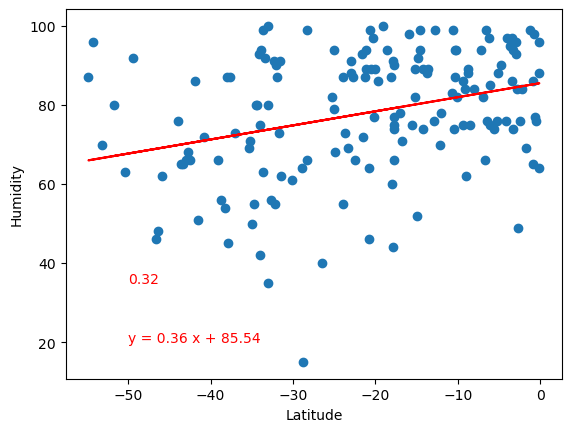

In [62]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y =southern_hemi_df['Humidity']
slope,intercept, rvalue,pvalue,stderr = stats.linregress(x,y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line,(-50,20),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(-50,35),fontsize=10,color="red")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** 
- it seems not to be a correlation between latitude and humidity for northem locstions, the correlation is up to 43% while in the south is 32%,  as with max temperature does, it seems not to be a correlation but, behaives just as with max temp this posiblely because humidity and temperature are related

### Cloudiness vs. Latitude Linear Regression Plot

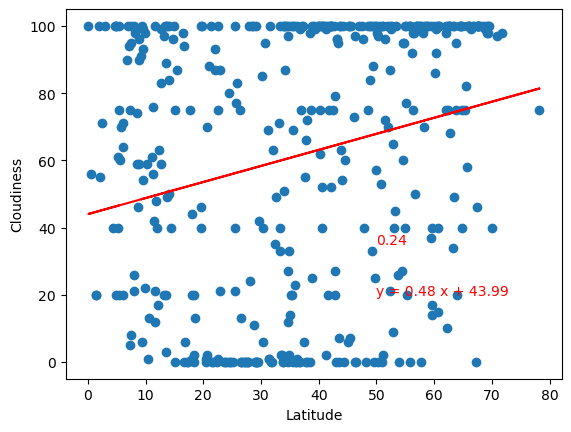

In [71]:
# Northern Hemisphere
x = northerns_hemi_df['Lat']
y = northerns_hemi_df['Cloudiness']
slope,intercept, rvalue,pvalue,stderr = stats.linregress(x,y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line,(50,20),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(50,35),fontsize=10,color="red")
plt.show()
# YOUR CODE HERE

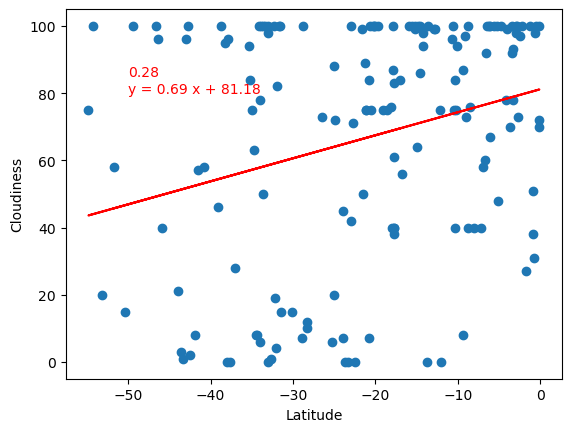

In [72]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
slope,intercept, rvalue,pvalue,stderr = stats.linregress(x,y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line,(-50,80),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(-50,85),fontsize=10,color="red")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** 
- for northem contries founded out a coeficient of correlation 24 %, it shows not correlation betweeen latitude and cloudines, also as it does with the south hemisfere, showing a correlation of 28%
- latitude and cloudines are not related

### Wind Speed vs. Latitude Linear Regression Plot

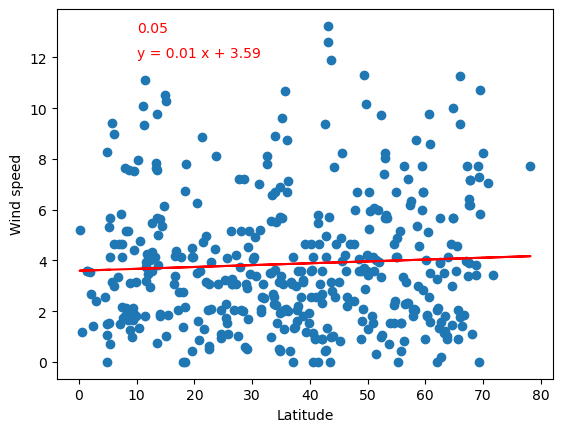

In [75]:
# Northern Hemisphere
x = northerns_hemi_df['Lat']
y = northerns_hemi_df['Wind Speed']
slope,intercept, rvalue,pvalue,stderr = stats.linregress(x,y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.annotate(line,(10,12),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(10,13),fontsize=10,color="red")
plt.show()
# YOUR CODE HERE

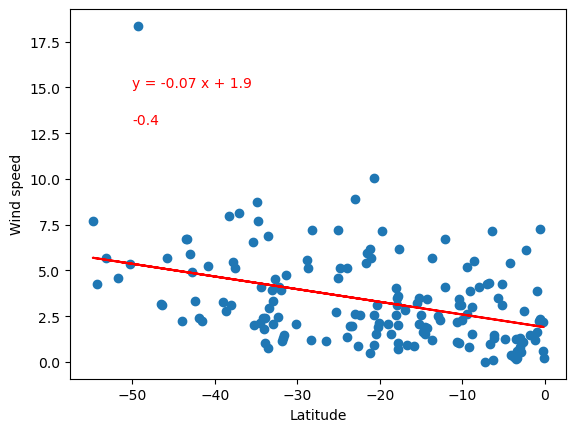

In [78]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
slope,intercept, rvalue,pvalue,stderr = stats.linregress(x,y)
regress_values = x * slope + intercept
line= f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"
plt.scatter(x,y)
plt.plot(x,regress_values,'red')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.annotate(line,(-50,15),fontsize=10,color="red")
plt.annotate(round(rvalue,2),(-50,13),fontsize=10,color="red")
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** 
- in this case the southern locations showned a higher correlation between wind speed and latitude, upt to 40%, while in the oposite side the correlationd decrease down to 0.05, this hughe difference of ccorrelation between esmiferes shows that mabe it could be a correlation or an external causation that could link this two variables 